**Import the libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pickle

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**READ THE DATA**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Datasets/star_classification.csv")
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


**DATA PREPROCESSING**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
data.drop(["obj_ID","spec_obj_ID"],axis=1,inplace=True)
data

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,GALAXY,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,GALAXY,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,GALAXY,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,GALAXY,0.455040,6751,56368,470


In [ ]:
encoder=LabelEncoder()
data['class']=encoder.fit_transform(data['class'])

In [ ]:
# Initialize the Isolation Forest model
iso=IsolationForest(random_state=1)

# fit the model
iso.fit(data)

IsolationForest(random_state=1)

In [ ]:
# predict the outliers
data['outliers']=iso.predict(data)
data['outliers']

,outliers
0,1
1,1
2,1
3,1
4,-1
...,...
99995,-1
99996,1
99997,1
99998,1


In [ ]:
data['outliers'] = data['outliers'].map({1: 0, -1: 1})


In [ ]:
df_cleaned= data[data['outliers'] == 0]


In [ ]:
# Drop the 'outlier' column as it is no longer needed
df= df_cleaned.drop(columns=['outliers'])
df

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,0,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,0,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,0,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,0,0.932346,9149,58039,775
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,1,1.424659,5026,55855,741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,317.246996,-0.682254,20.96526,19.81625,19.34186,19.14711,19.05790,4187,301,2,64,0,0.175206,1025,53239,51
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,0,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,0,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,0,0.455040,6751,56368,470


In [ ]:
X=df.drop(columns=["class"])
X

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,0.932346,9149,58039,775
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,1.424659,5026,55855,741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,317.246996,-0.682254,20.96526,19.81625,19.34186,19.14711,19.05790,4187,301,2,64,0.175206,1025,53239,51
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,0.455040,6751,56368,470


In [ ]:
y=df["class"]
y

,class
0,0
1,0
2,0
3,0
5,1
...,...
99994,0
99996,0
99997,0
99998,0


In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.37690775, 0.49813658, 0.56601523, ..., 0.45159189, 0.64800655,
        0.17017017],
       [0.40228889, 0.48600933, 0.63762615, ..., 0.8288413 , 0.89432004,
        0.42642643],
       [0.39496285, 0.52881934, 0.67630753, ..., 0.35094862, 0.54396505,
        0.2982983 ],
       ...,
       [0.62385332, 0.33125987, 0.3501188 , ..., 0.20340363, 0.399645  ,
        0.07307307],
       [0.58963366, 0.63889767, 0.68326489, ..., 0.52805146, 0.64991808,
        0.46946947],
       [0.54693107, 0.66676302, 0.46585301, ..., 0.58171159, 0.75040961,
        0.85085085]])

**Exploratory Data Analysis**

In [ ]:
df.describe()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
count,77510.000000,77510.000000,77510.000000,77510.000000,77510.000000,77510.000000,77510.000000,77510.000000,77510.0,77510.000000,77510.000000,77510.000000,77510.000000,77510.000000,77510.000000,77510.000000
mean,180.412625,26.584401,22.262878,20.766267,19.716452,19.131534,18.803566,4362.776158,301.0,3.537324,168.835660,0.497278,0.562144,5097.111250,55610.909044,453.778480
std,86.694914,18.807146,2.056593,1.771022,1.584648,1.503618,1.516367,1824.586525,0.0,1.530635,122.759589,0.756066,0.629282,2710.148487,1650.900384,266.446731
min,0.005528,-17.636198,16.774910,16.091830,15.410890,14.979780,14.524850,109.000000,301.0,1.000000,11.000000,0.000000,-0.009971,266.000000,51608.000000,1.000000
25%,133.822798,11.186977,20.620515,19.304343,18.442393,18.007183,17.717725,3187.000000,301.0,2.000000,81.000000,0.000000,0.108519,2757.000000,54537.000000,231.000000
50%,182.854783,27.156434,22.276930,21.170555,20.159260,19.413015,19.004860,3970.000000,301.0,4.000000,140.000000,0.000000,0.462842,5003.000000,55889.000000,440.000000
75%,230.180534,41.684673,23.713117,22.101118,20.919340,20.213920,19.804868,5194.000000,301.0,5.000000,221.000000,1.000000,0.665707,7098.000000,56625.000000,649.000000
max,359.997006,83.000519,29.325650,27.388510,27.397090,29.854050,28.238290,8162.000000,301.0,6.000000,844.000000,2.000000,7.011245,12547.000000,58932.000000,1000.000000


Text(0, 0.5, 'Count')

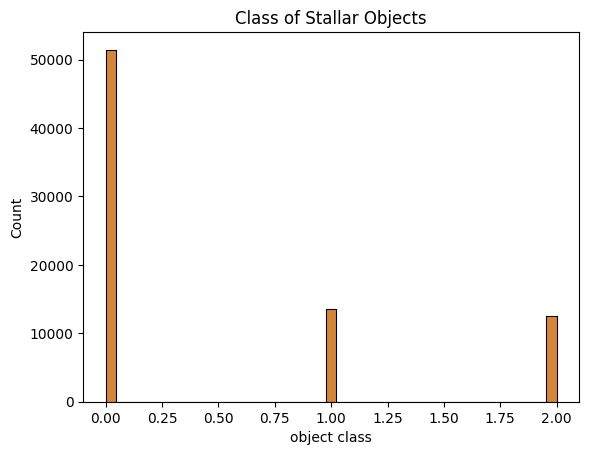

In [ ]:
sns.histplot(df['class'])
plt.title('Class of Stallar Objects')
ax = sns.histplot(df['class'])
plt.xlabel('object class')
plt.ylabel('Count')

Dominant Class: The majority of stellar objects fall into class 0.00, with a count of approximately 60,000. This indicates that class 0.00-Galaxy is the most common type of stellar object in the dataset.

Second Most Common: Class 1.00-QSA has a significantly lower count, with approximately 20,000 objects. This class is the second most prevalent, but there's a notable drop compared to class 0.00.

Least Common: Class 2.00-Star has the fewest objects, with approximately 15,000. This class is the least represented in the dataset.

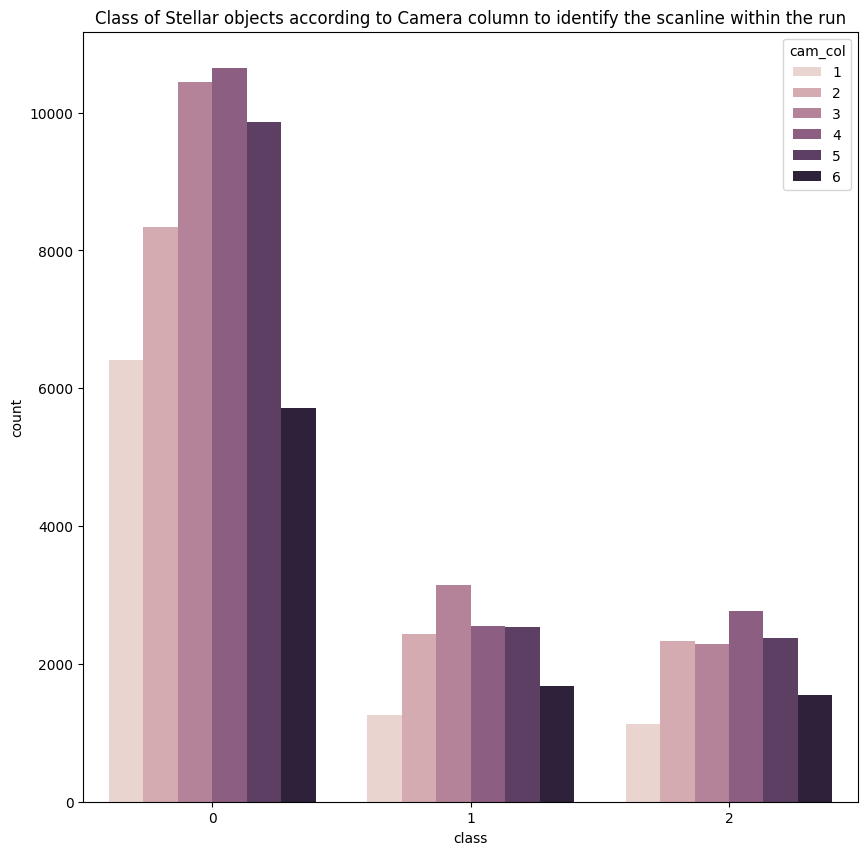

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='class',data=df,hue='cam_col')
plt.title('Class of Stellar objects according to Camera column to identify the scanline within the run')
plt.show()

Class 0 Dominance: Class 0 has the highest count across all camera columns, with particularly high counts in columns 1, 2, and 3. This class is the most prevalent in the dataset, making it a significant focus for analysis.

Class 1 Patterns: Class 1 shows its highest counts in camera columns 2 and 3, although its overall count is significantly lower than class 0. This indicates some level of concentration in specific columns.

Class 2 Distribution: Class 2 has a relatively even distribution across camera columns 2, 3, and 4, but with much lower counts compared to classes 0 and 1. This class is the least represented.

Camera Column Influence: The distribution of counts across different camera columns suggests that the columns themselves may influence the detection or representation of different stellar object classes. This could be due to various factors like the sensitivity, orientation, or coverage of each column.

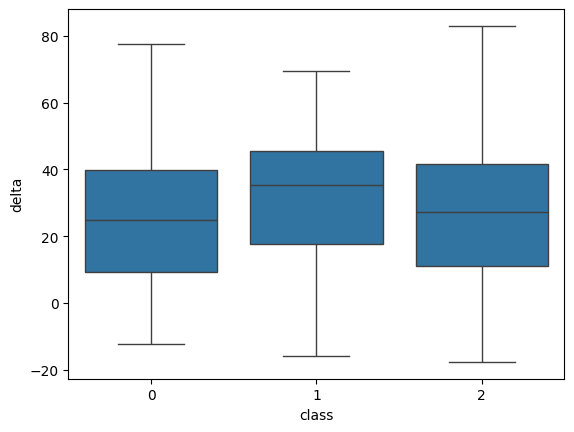

In [ ]:
sns.boxplot(x='class',y='delta',data=df)
plt.show()


The distribution of "delta" values is relatively consistent across the three classes.

The central tendency (median) and variability (IQR) are similar for each class.

The presence of outliers suggests that there might be some unique observations that differ from the typical data points.




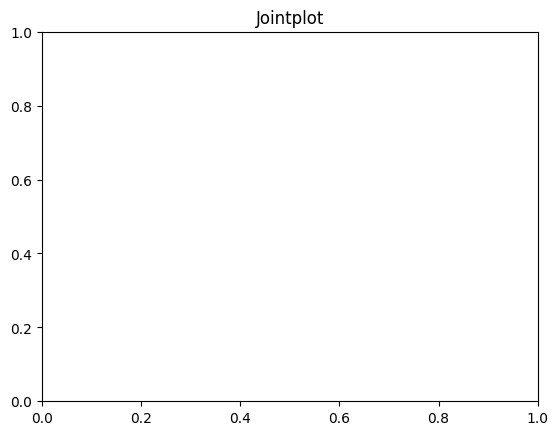

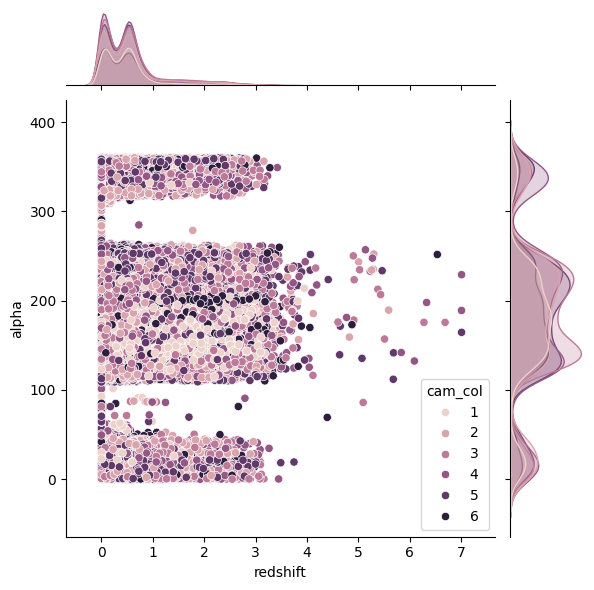

In [ ]:
plt.title("Jointplot")
sns.jointplot(x='redshift',y='alpha',data=df,hue='cam_col')

Scatter Plot Insights:

The plot displays the relationship between two variables: "redshift" on the x-axis and "alpha" on the y-axis.

Each data point is color-coded based on the "cam_col" variable, which ranges from 1 to 6.

The different colors help to identify how the "cam_col" variable influences the relationship between "redshift" and "alpha."

Marginal Histograms:

The histogram on the top of the plot shows the distribution of the "redshift" variable.

The histogram on the right side of the plot displays the distribution of the "alpha" variable.

These histograms provide additional context by showing how each variable is distributed across the dataset.

Patterns and Trends:

The scatter plot suggests there might be some correlation between "redshift" and "alpha," as the points seem to follow a particular pattern.

The color-coding indicates that the "cam_col" variable could influence the observed relationship. For instance, certain columns might have higher densities of data points in specific regions of the plot.

**Correlation matrix**

Text(0.5, 1.0, ' stellar correlation matrix')

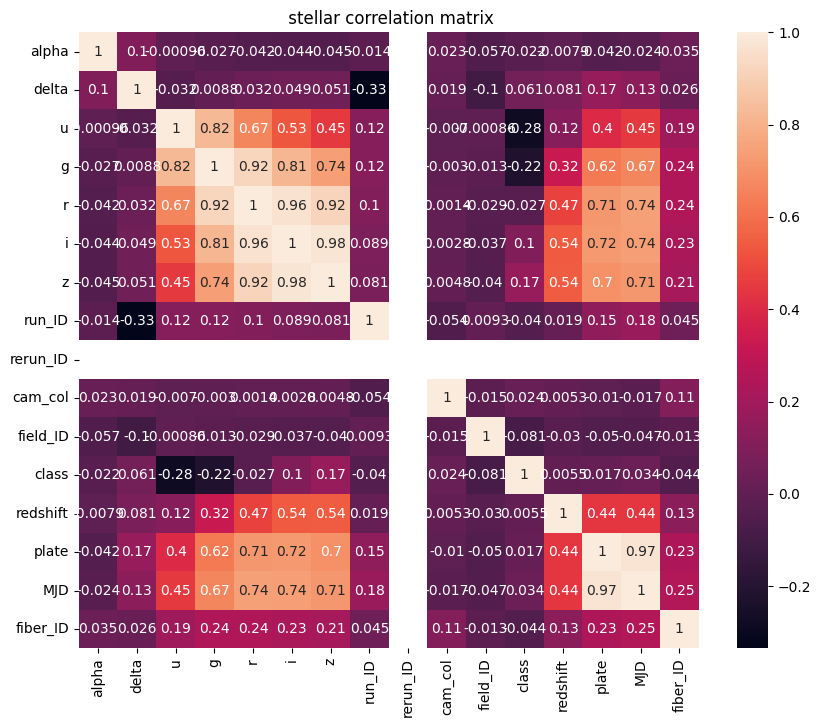

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.title(" stellar correlation matrix")

In [ ]:
corr_matrix["class"].sort_values(ascending=False)

,class
class,1.000000
z,0.169520
i,0.103106
delta,0.060530
MJD,0.034123
cam_col,0.024163
plate,0.016874
redshift,0.005471
alpha,-0.021850
r,-0.026977


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

***************** KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0     0.8968    0.9680    0.9311     15446
           1     0.9203    0.8433    0.8801      4078
           2     0.8541    0.6514    0.7391      3729

    accuracy                         0.8954     23253
   macro avg     0.8904    0.8209    0.8501     23253
weighted avg     0.8941    0.8954    0.8913     23253

***************** SVC() *****************
              precision    recall  f1-score   support

           0     0.9616    0.9758    0.9686     15446
           1     0.9704    0.9080    0.9382      4078
           2     0.9290    0.9375    0.9333      3729

    accuracy                         0.9578     23253
   macro avg     0.9537    0.9404    0.9467     23253
weighted avg     0.9579    0.9578    0.9576     23253

***************** GaussianNB() *****************
              precision    recall  f1-score   support

           0     0.9667    0.9041

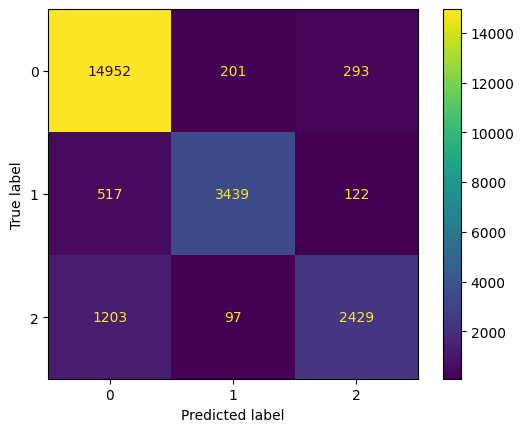

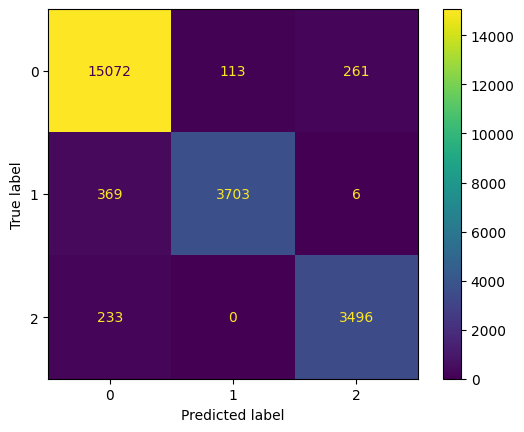

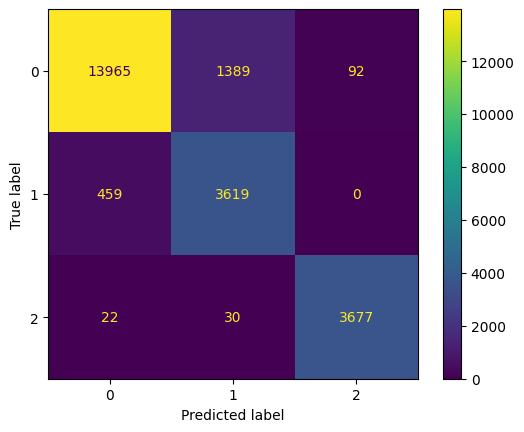

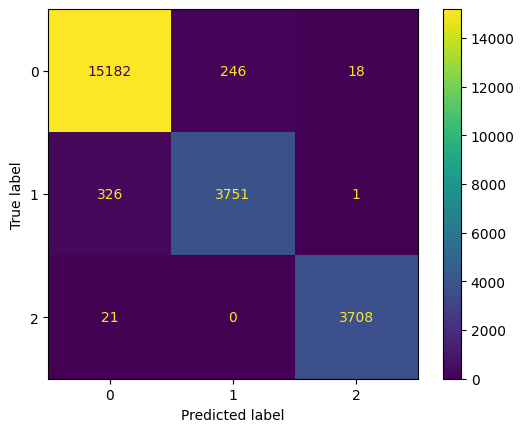

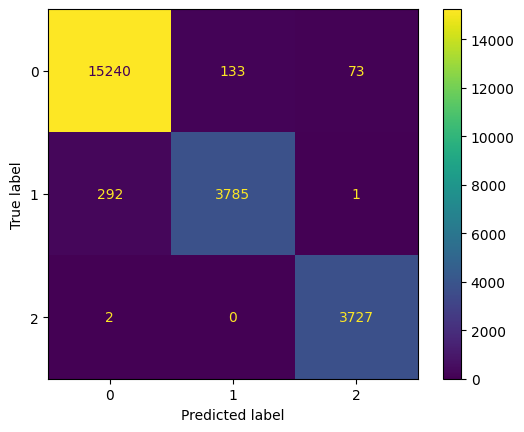

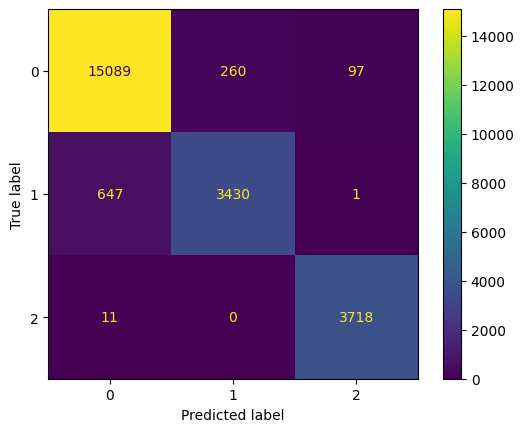

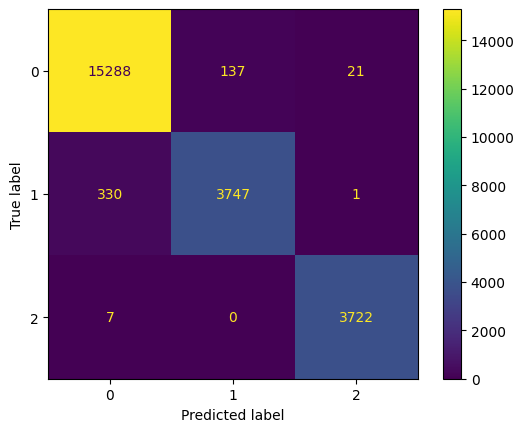

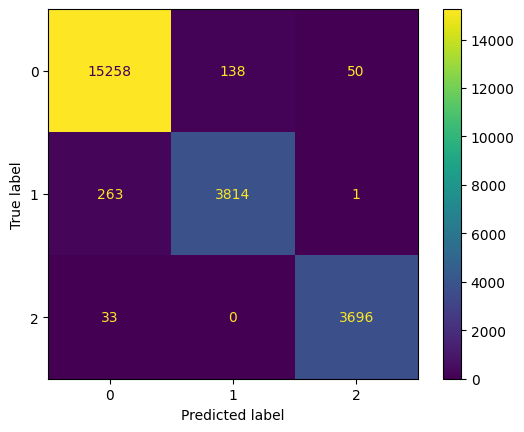

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=13)
rf=RandomForestClassifier(criterion='entropy',random_state=1,max_depth=11)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xb=XGBClassifier(random_state=1)
models=[knn,svc,nb,dt,rf,ab,gb,xb]
for model in models:
  print('*****************',model,'*****************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred,digits=4))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**FEATURE SELECTION**

In [ ]:
mi_scores = mutual_info_classif(X_scaled,y)

In [ ]:
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)
mi_scores

,0
redshift,0.721029
plate,0.267401
MJD,0.190781
z,0.154067
run_ID,0.144143
g,0.135272
i,0.116804
u,0.113843
r,0.072189
fiber_ID,0.054714


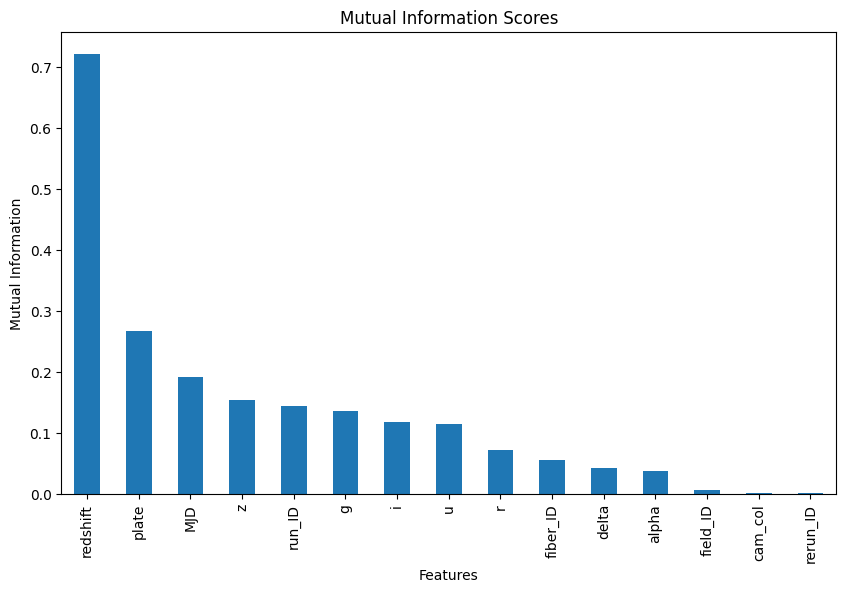

In [ ]:
plt.figure(figsize=(10, 6))
mi_scores.plot.bar()
plt.title('Mutual Information Scores')
plt.ylabel('Mutual Information')
plt.xlabel('Features')
plt.show()

In [ ]:
top_N = 10
top_features = mi_scores.index[:top_N]
X_top = X[top_features]
top_features

Index(['redshift', 'plate', 'MJD', 'z', 'run_ID', 'g', 'i', 'u', 'r',
       'fiber_ID'],
      dtype='object')

Recall the X with selected features

In [ ]:
X = X_top[['u', 'g', 'r', 'i', 'z', 'redshift', 'plate','MJD', 'run_ID', 'fiber_ID']]
X

,u,g,r,i,z,redshift,plate,MJD,run_ID,fiber_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,56354,3606,171
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,58158,4518,427
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,55592,3606,299
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,58039,4192,775
5,23.48827,23.33776,21.32195,20.25615,19.54544,1.424659,5026,55855,8102,741
...,...,...,...,...,...,...,...,...,...,...
99994,20.96526,19.81625,19.34186,19.14711,19.05790,0.175206,1025,53239,4187,51
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626,56934,7917,866
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764,54535,5314,74
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751,56368,3650,470


In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.56601523, 0.54737055, 0.41582153, ..., 0.64800655, 0.43424811,
        0.17017017],
       [0.63762615, 0.5966399 , 0.59848409, ..., 0.89432004, 0.54749783,
        0.42642643],
       [0.67630753, 0.58176916, 0.43373797, ..., 0.54396505, 0.43424811,
        0.2982983 ],
       ...,
       [0.3501188 , 0.28133398, 0.23305051, ..., 0.399645  , 0.64634298,
        0.07307307],
       [0.68326489, 0.49091769, 0.37567953, ..., 0.64991808, 0.43971191,
        0.46946947],
       [0.46585301, 0.50507052, 0.43301964, ..., 0.75040961, 0.43971191,
        0.85085085]])

Test-Train split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

Building Models

***************** KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0     0.9265    0.9683    0.9469     15446
           1     0.9564    0.8990    0.9268      4078
           2     0.8788    0.7721    0.8220      3729

    accuracy                         0.9247     23253
   macro avg     0.9206    0.8798    0.8986     23253
weighted avg     0.9241    0.9247    0.9234     23253

***************** SVC() *****************
              precision    recall  f1-score   support

           0     0.9673    0.9768    0.9720     15446
           1     0.9717    0.9090    0.9393      4078
           2     0.9331    0.9608    0.9468      3729

    accuracy                         0.9624     23253
   macro avg     0.9574    0.9489    0.9527     23253
weighted avg     0.9626    0.9624    0.9622     23253

***************** GaussianNB() *****************
              precision    recall  f1-score   support

           0     0.9675    0.9052

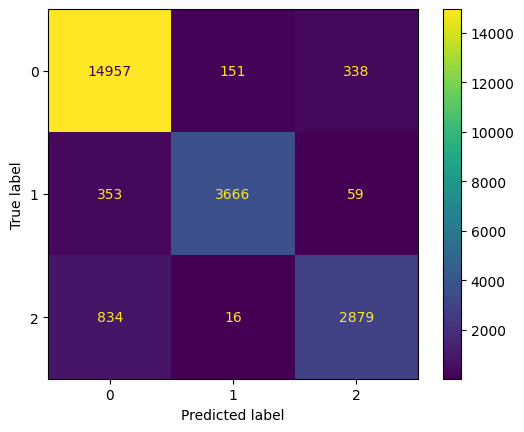

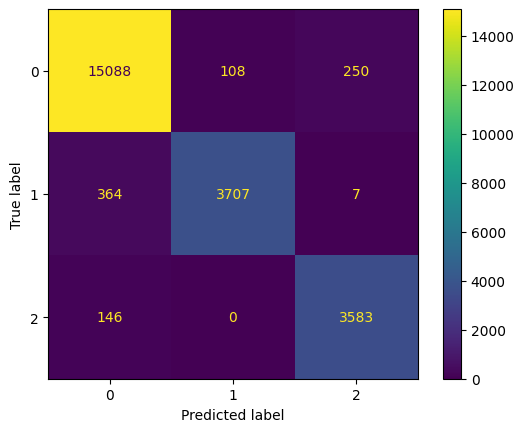

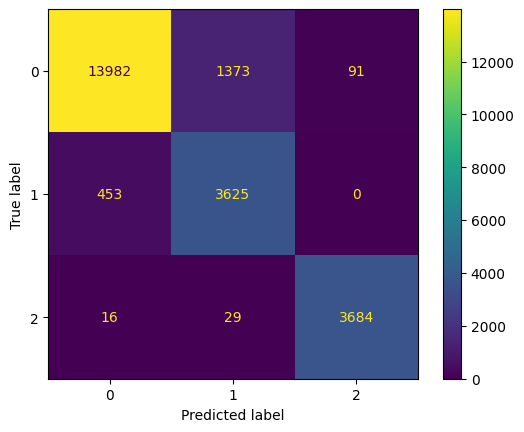

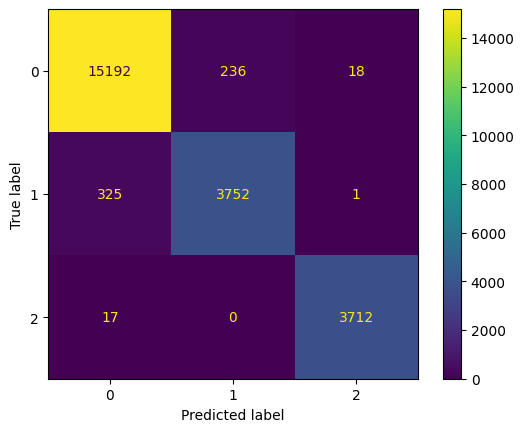

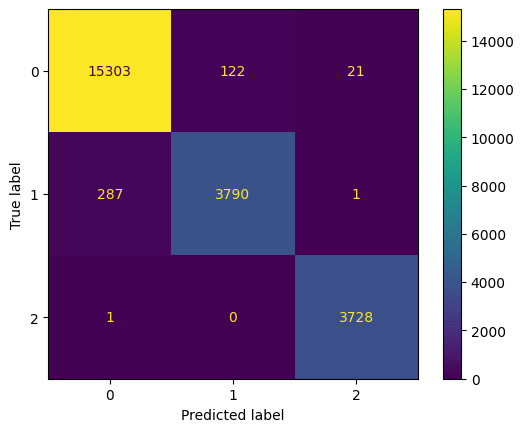

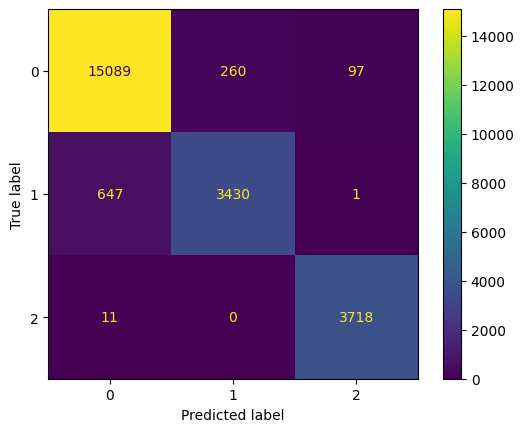

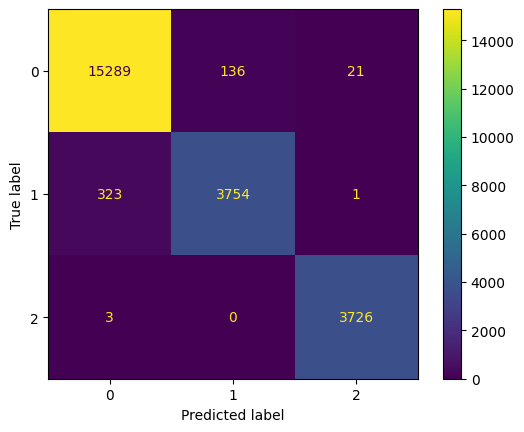

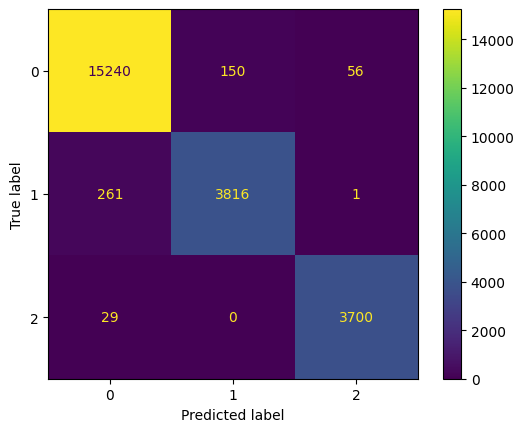

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=13)
rf=RandomForestClassifier(criterion='entropy',random_state=1,max_depth=11)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xb=XGBClassifier(random_state=1)
models=[knn,svc,nb,dt,rf,ab,gb,xb]
for model in models:
  print('*****************',model,'*****************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred,digits=4))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
y.value_counts()

,count
class,
0,51431
1,13614
2,12465


This indicates is an unbalanced data

**Oversampling**

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X_scaled,y)

In [ ]:
y_os.value_counts()

,count
class,
0,51431
1,51431
2,51431


In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

***************** KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0     0.9555    0.9153    0.9350     15346
           1     0.9681    0.9724    0.9702     15483
           2     0.9449    0.9803    0.9623     15459

    accuracy                         0.9561     46288
   macro avg     0.9562    0.9560    0.9558     46288
weighted avg     0.9562    0.9561    0.9559     46288

***************** SVC() *****************
              precision    recall  f1-score   support

           0     0.9433    0.9576    0.9504     15346
           1     0.9812    0.9445    0.9625     15483
           2     0.9760    0.9979    0.9868     15459

    accuracy                         0.9667     46288
   macro avg     0.9668    0.9667    0.9666     46288
weighted avg     0.9669    0.9667    0.9666     46288

***************** GaussianNB() *****************
              precision    recall  f1-score   support

           0     0.9033    0.8727

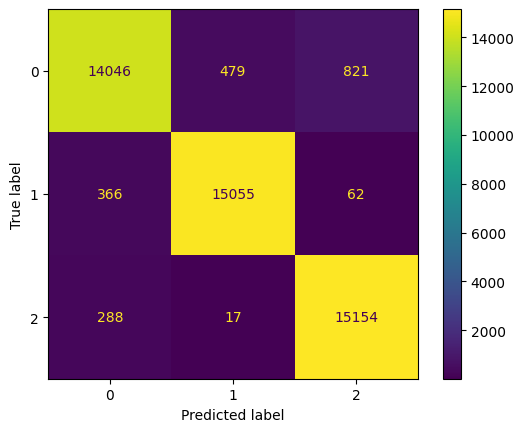

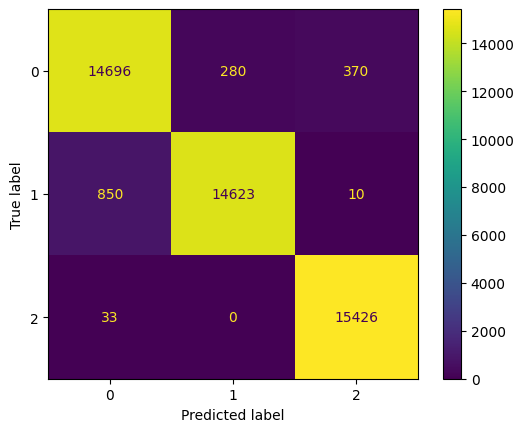

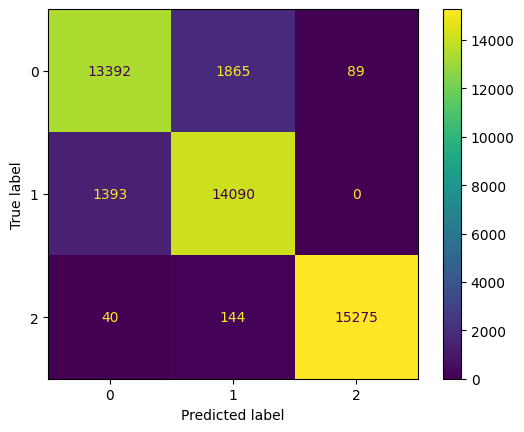

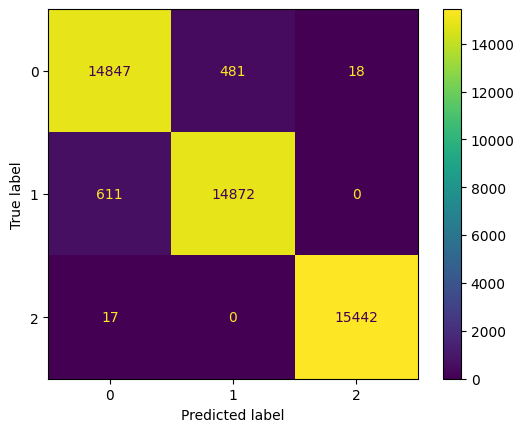

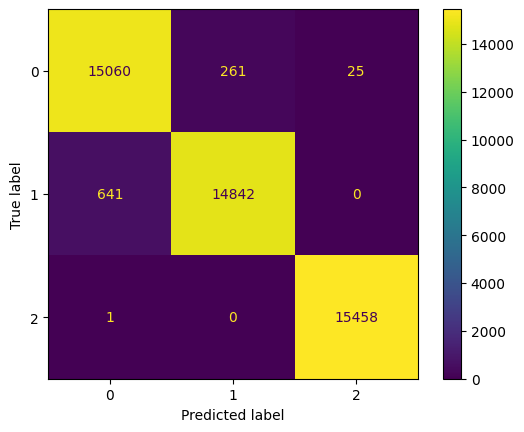

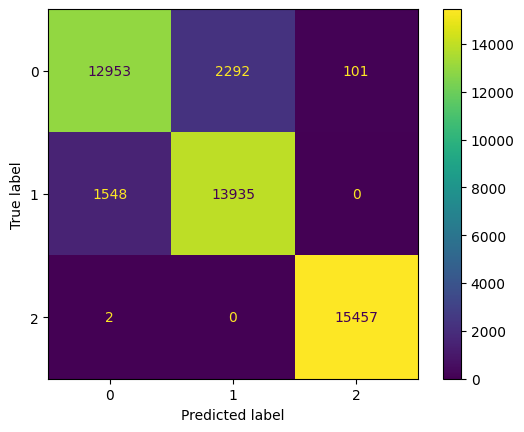

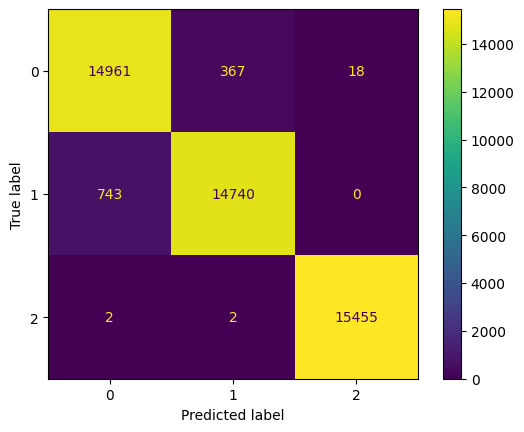

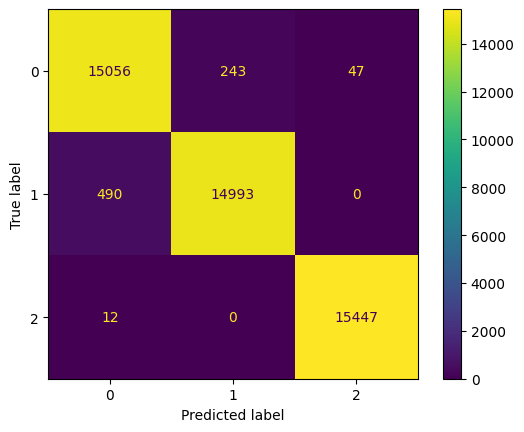

In [ ]:
knn_os=KNeighborsClassifier()
svc_os=SVC()
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=13)
rf_os=RandomForestClassifier(criterion='entropy',random_state=1,max_depth=11)
ab_os=AdaBoostClassifier(random_state=1)
gb_os=GradientBoostingClassifier(random_state=1)
xb_os=XGBClassifier(random_state=1)
models=[knn_os,svc_os,nb_os,dt_os,rf_os,ab_os,gb_os,xb_os]
for model in models:
  print('*****************',model,'*****************')
  model.fit(X_train_os,y_train_os)
  y_pred=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred,digits=4))
  print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred))

In [ ]:
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X_scaled,y)

In [ ]:
y_us.value_counts()

,count
class,
0,12465
1,12465
2,12465


In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

***************** KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0     0.8435    0.9113    0.8761      3756
           1     0.9688    0.9114    0.9392      3714
           2     0.9062    0.8864    0.8962      3749

    accuracy                         0.9030     11219
   macro avg     0.9062    0.9030    0.9038     11219
weighted avg     0.9059    0.9030    0.9037     11219

***************** SVC() *****************
              precision    recall  f1-score   support

           0     0.9253    0.9396    0.9324      3756
           1     0.9816    0.9327    0.9565      3714
           2     0.9559    0.9883    0.9718      3749

    accuracy                         0.9536     11219
   macro avg     0.9542    0.9535    0.9536     11219
weighted avg     0.9541    0.9536    0.9535     11219

***************** GaussianNB() *****************
              precision    recall  f1-score   support

           0     0.9059    0.8637

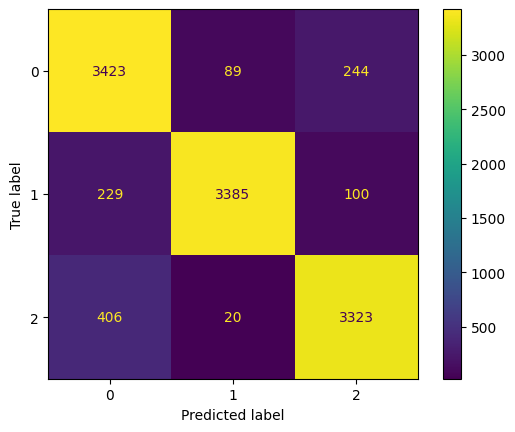

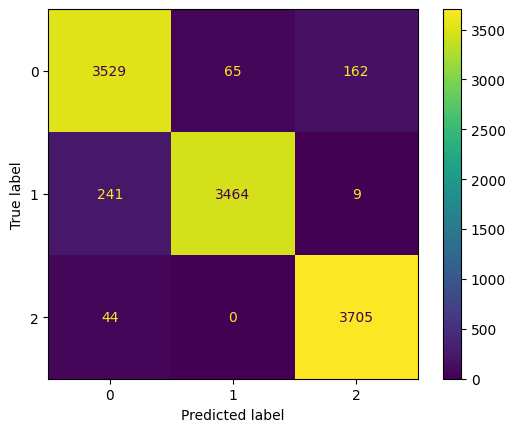

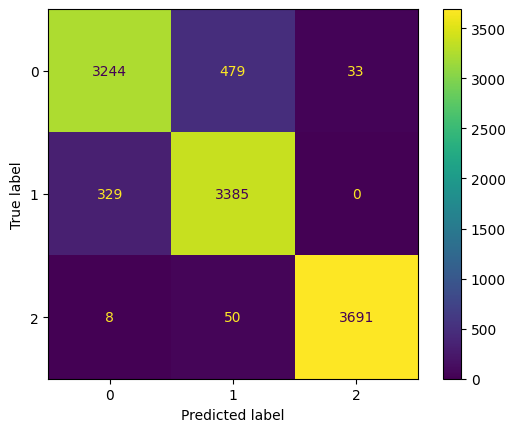

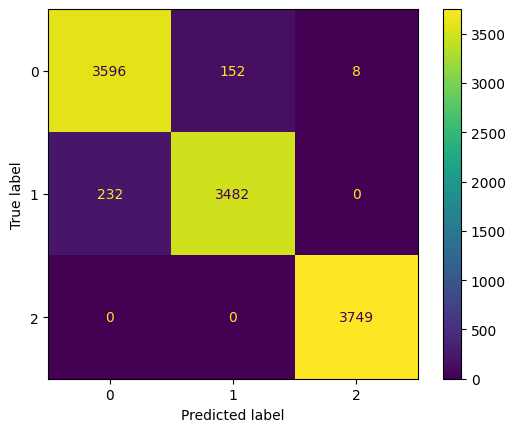

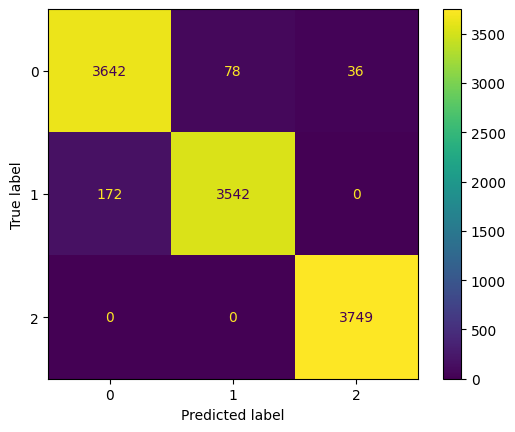

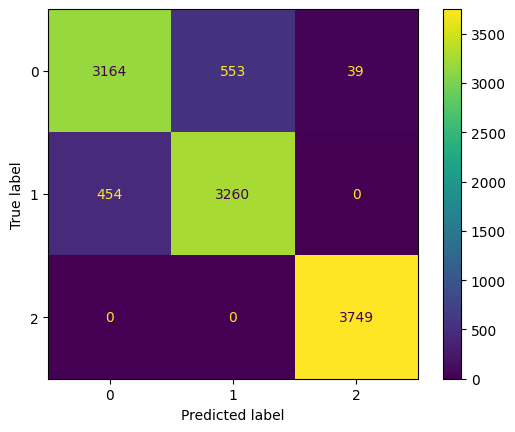

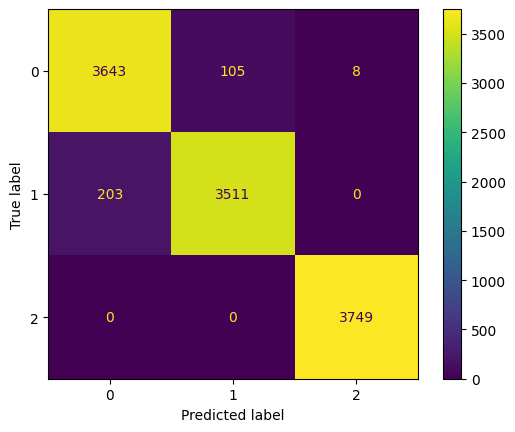

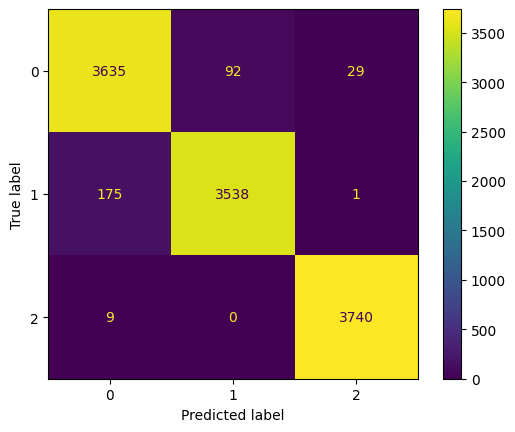

In [ ]:
knn_us=KNeighborsClassifier()
svc_us=SVC()
nb_us=GaussianNB()
dt_us=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=13)
rf_us=RandomForestClassifier(criterion='entropy',random_state=1,max_depth=11)
ab_us=AdaBoostClassifier(random_state=1)
gb_us=GradientBoostingClassifier(random_state=1)
xb_us=XGBClassifier(random_state=1)
models=[knn_us,svc_us,nb_us,dt_us,rf_us,ab_us,gb_us,xb_us]
for model in models:
  print('*****************',model,'*****************')
  model.fit(X_train_us,y_train_us)
  y_pred=model.predict(X_test_us)
  print(classification_report(y_test_us,y_pred,digits=4))
  print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred))

**Gradient boosting model with oversampling is the best model**

**pickle the best model**

In [ ]:
pickle.dump(xb_os,open('xb_model.sav','wb'))
pickle.dump(scaler,open('scaler.sav','wb'))

In [ ]:
predict_new=xb_os.predict(scaler.transform([[24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,58158,4518,427]]))
predict_new

array([0])